### <center>Fatahillah Rahmat Haris Setiawan</center>
#### <center>F1D022044</center>

# Here you can put your extraordinary code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv    

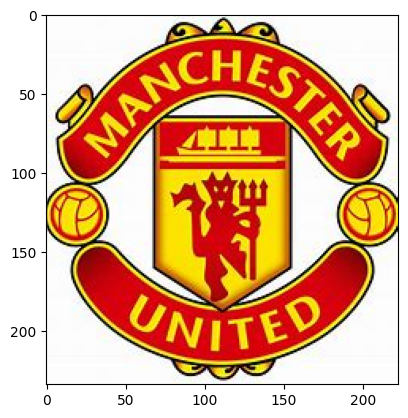

In [14]:
image = plt.imread('manchester_united.jpeg')
plt.imshow(image)

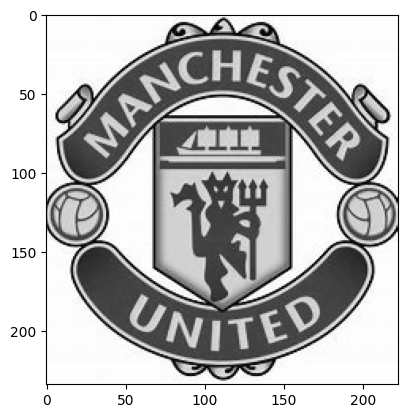

In [16]:
img = cv.imread("manchester_united.jpeg")
img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_grayscale, cmap = "gray")

Mean: 167.40149860105018, Median: 176.0, Mode: 253


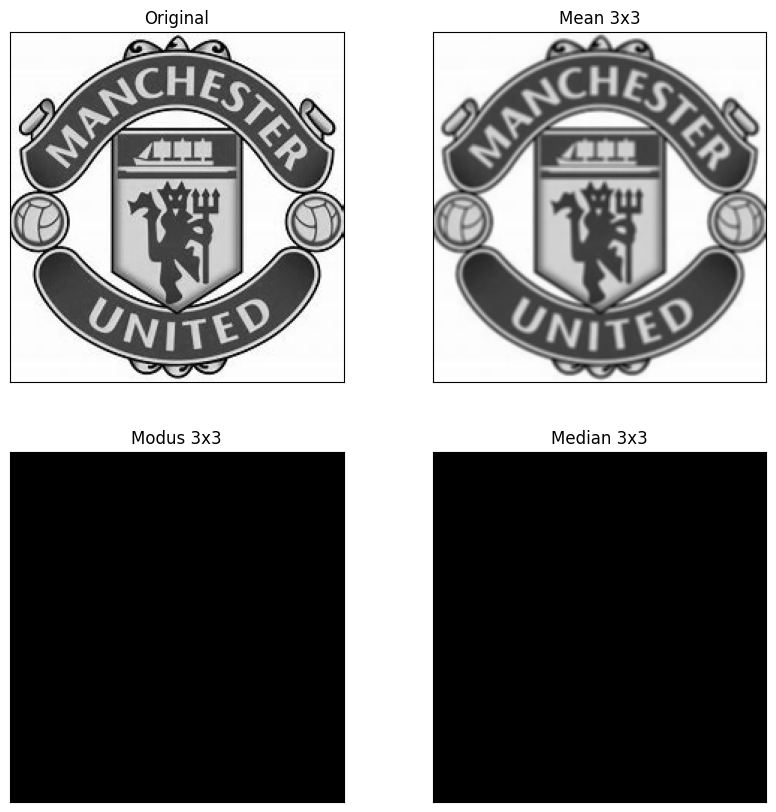

In [29]:
# Fungsi untuk melakukan konvolusi dengan kernel 3x3 berisi 1/9
def convolve_with_kernel(img_grayscale):
    kernel = np.ones((3,3),np.float32)/9
    return cv.filter2D(img_grayscale,-1,kernel)

# Fungsi untuk mencari mean, median, dan modus
def get_statistics(img_grayscale):
    mean = np.mean(img_grayscale)
    median = np.median(img_grayscale)
    mode = np.argmax(np.bincount(img_grayscale.flatten()))
    return mean, median, mode

# Lakukan konvolusi
convolved_image = convolve_with_kernel(img_grayscale)

# Dapatkan statistik
mean, median, mode = get_statistics(convolved_image)

print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

# Buat gambar baru dengan setiap piksel diatur ke nilai mean, median, dan modus
mean_image = np.full(img_grayscale.shape, mean, np.uint8)
median_image = np.full(img_grayscale.shape, median, np.uint8)
mode_image = np.full(img_grayscale.shape, mode, np.uint8)

# Tampilkan citra asli dan citra hasil konvolusi
plt.figure(figsize=(10, 10))

plt.subplot(221),plt.imshow(img_grayscale, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(convolved_image, cmap='gray'),plt.title('Mean 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(mode_image, cmap='gray'),plt.title('Modus 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median_image, cmap='gray'),plt.title('Median 3x3')
plt.xticks([]), plt.yticks([])

plt.show()



Mean: 167.3729063661799, Median: 156.0, Mode: 253


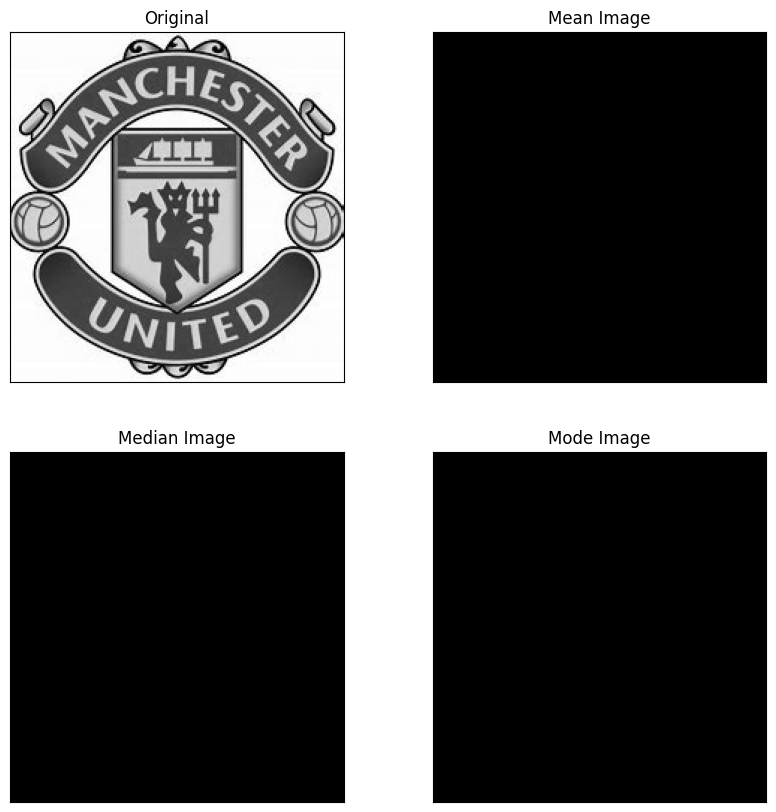

In [27]:
# Fungsi untuk melakukan konvolusi dengan kernel 9x9 berisi 1/81
def convolve_with_kernel(img_grayscale):
    kernel = np.ones((9,9),np.float32)/81
    return cv.filter2D(img_grayscale,-1,kernel)

# Fungsi untuk mencari mean, median, dan modus
def get_statistics(img_grayscale):
    mean = np.mean(img_grayscale)
    median = np.median(img_grayscale)
    mode = np.argmax(np.bincount(img_grayscale.flatten()))
    return mean, median, mode

# Lakukan konvolusi
convolved_image = convolve_with_kernel(img_grayscale)

mean, median, mode = get_statistics(convolved_image)

print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

# Buat gambar baru dengan setiap piksel diatur ke nilai mean, median, dan modus
mean_image = np.full(img_grayscale.shape, mean, np.uint8)
median_image = np.full(img_grayscale.shape, median, np.uint8)
mode_image = np.full(img_grayscale.shape, mode, np.uint8)

plt.figure(figsize=(10, 10))

plt.subplot(221),plt.imshow(img_grayscale, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(mean_image, cmap='gray'),plt.title('Mean Image')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(median_image, cmap='gray'),plt.title('Median Image')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(mode_image, cmap='gray'),plt.title('Mode Image')
plt.xticks([]), plt.yticks([])

plt.show()
